# Анализ данных по объекту P1 (2022 - 2023.05)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import numpy as np
import sklearn.linear_model as lm
import plotly.express as px

## Содание DataFrame и его подготовка для анализа

1. Чтение данных из исходного файда csv:

In [2]:
df = pd.read_csv(r".\data\result_data.csv")

In [3]:
df

,Unnamed: 0,system_id,comment_creation_date,project_name,set_id,doc_id,set_rev,doc_name,comment_type,comment_detailed_type,comment_text,division,response_text,response_author,response_date,comment_status,comment_author,doc_rev,num_of_pages
0,0,ID-014995,2022-07-18 12:06:00,P1,set-251-00000910,doc-251-000001260,1,doc-251-000001260_name,type_4,subtype_9,comment_text,division_10,response_text,response_author_60,2022-07-25 05:18:37,not_accepted,NaN,NaN,NaN
1,1,ID-028882,2023-02-07 08:44:19,P1,set-60-000003700,doc-60-000006080,2,doc-60-000006080_name,type_3,subtype_10,comment_text,division_9,response_text,response_author_8,2023-02-17 13:42:57,not_accepted,comment_author_26,2.0,16.0
2,2,ID-035413,2023-05-02 05:56:27,P1,set-60-000006465,doc-60-0000010813,1,doc-60-0000010813_name,type_3,subtype_20,comment_text,division_23,response_text,response_author_116,2023-05-11 05:06:46,accepted,comment_author_27,1.0,6.0
3,3,ID-006906,2022-07-13 14:01:54,P1,set-289-000002242,doc-289-000003283,1,doc-289-000003283_name,type_2,subtype_4,comment_text,division_10,response_text,response_author_24,2022-07-21 06:45:17,fixed,NaN,NaN,NaN
4,4,ID-018572,2022-11-22 08:34:50,P1,set-60-000004037,doc-60-000006672,1,doc-60-000006672_name,type_3,subtype_17,comment_text,NaN,response_text,response_author_367,2022-11-29 12:28:24,accepted,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18678,18678,ID-033624,2023-04-05 12:13:16,P1,set-65-000002501,doc-65-0000010014,3,doc-65-0000010014_name,type_3,subtype_10,comment_text,division_46,response_text,response_author_636,2023-04-10 05:44:16,fixed,comment_author_48,3.0,34.0
18679,18679,ID-021763,2022-11-11 20:42:01,P1,set-65-000004788,doc-65-000007946,1,doc-65-000007946_name,type_1,subtype_6,comment_text,division_91,response_text,response_author_514,2022-11-17 13:07:04,fixed,NaN,NaN,NaN
18680,18680,ID-033146,2023-03-29 15:10:33,P1,NaN,NaN,1,NaN,type_1,subtype_3,comment_text,division_82,response_text,response_author_568,2023-04-28 07:41:47,fixed,NaN,1.0,250.0
18681,18681,ID-024638,2022-12-16 10:29:33,P1,set-381-000002108,doc-381-000003729,2,doc-381-000003729_name,type_3,subtype_7,comment_text,division_67,response_text,response_author_94,2022-12-20 12:34:50,fixed,NaN,NaN,NaN


In [4]:
# Дропаем лишний столбец с индексом
df = df.drop('Unnamed: 0',axis=1)

In [5]:
# Проверяем типы данных по столбцам
df.dtypes

system_id                 object
comment_creation_date     object
project_name              object
set_id                    object
doc_id                    object
set_rev                    int64
doc_name                  object
comment_type              object
comment_detailed_type     object
comment_text              object
division                  object
response_text             object
response_author           object
response_date             object
comment_status            object
comment_author            object
doc_rev                  float64
num_of_pages             float64
dtype: object

2. Подготовка датафрейма для последующего анализа данных

In [6]:
# Указываем на данные datetime
df[['comment_creation_date','response_date']] = df[['comment_creation_date',
                                                          'response_date']].apply(pd.to_datetime)

In [7]:
# Словарь имен столбцов (для присвоения типа string)
arr_col_str_type = ['system_id',
                    'project_name',
                    'set_id',
                    'doc_id',
                    'doc_name',
                    'comment_type',
                    'comment_detailed_type',
                    'comment_text',
                    'division',
                    'response_text',
                    'response_author',
                    'comment_status',
                    'comment_author',
                    'set_rev',
                    'doc_rev']

In [8]:
# Указываем на данные типа string (кроме значений NaN)
df[arr_col_str_type] = df[arr_col_str_type].astype(str).where(df.notnull())

In [9]:
df.isna().mean()

system_id                0.000000
comment_creation_date    0.000000
project_name             0.000000
set_id                   0.020446
doc_id                   0.056950
set_rev                  0.000000
doc_name                 0.056950
comment_type             0.000000
comment_detailed_type    0.000214
comment_text             0.000000
division                 0.046513
response_text            0.134507
response_author          0.178933
response_date            0.139378
comment_status           0.134293
comment_author           0.723010
doc_rev                  0.731360
num_of_pages             0.693839
dtype: float64

2.1 Фильтруем датасет по интересующим паттернам в ID документов, соответствующим разработчикам документов, по которым будет проводится анализ:

In [10]:
df = df[df['doc_id'].str.contains('-55-|-60-|-65-')==True].copy()

3. Анализ пропусков в данных:

In [11]:
df.isna().mean()

system_id                0.000000
comment_creation_date    0.000000
project_name             0.000000
set_id                   0.000067
doc_id                   0.000000
set_rev                  0.000000
doc_name                 0.000000
comment_type             0.000000
comment_detailed_type    0.000133
comment_text             0.000000
division                 0.032452
response_text            0.124275
response_author          0.148731
response_date            0.128207
comment_status           0.124075
comment_author           0.725328
doc_rev                  0.706670
num_of_pages             0.706670
dtype: float64

<b>Комментарий</b>: 13% пропусков у дат ответов, 7% пропуском для количества страниц в документе. Эти данные не будт использоваться для анализа, так что все ок.

## Анализ данных

1. Анализ распределения замечаний **по видам** на рассматирваемом временном отрезке:

In [12]:
# Группирока полученных комментариев по видам
df_comment_types = df[['comment_type','comment_detailed_type']].\
                groupby(['comment_type']).agg({'comment_detailed_type':'count'}).\
                sort_values('comment_detailed_type', ascending=False).\
                rename(columns={'comment_detailed_type': 'comments_count'}).\
                reset_index().copy()

In [13]:
# Добавление информации о процентном соотношении для каждого из видов комментариев
df_comment_types['type_per'] = round(df_comment_types['comments_count'] / \
                                     df_comment_types['comments_count'].sum() * 100, 1)

In [14]:
df_comment_types.head()

,comment_type,comments_count,type_per
0,type_1,6420,42.8
1,type_3,5011,33.4
2,type_4,1550,10.3
3,type_5,1472,9.8
4,type_2,546,3.6


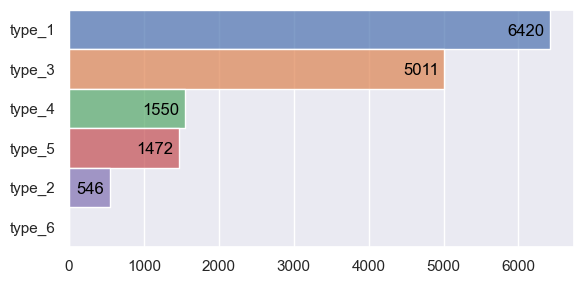

In [15]:
# Построение столбчатой диаграммы, отражающей соотношение количество поступивших комментариев по видам

p = so.Plot(data = df_comment_types, x='comments_count', y='comment_type', text='comments_count',
           color="comment_type").layout(size=(6, 3))
p.add(so.Bars(), legend=False).add(so.Text(halign='right', color='black')).label(x="", y="", color="").show()

В процентах:

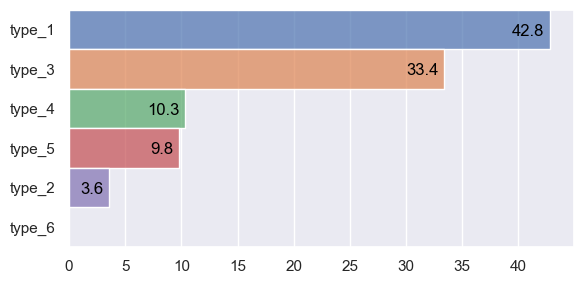

In [16]:
p = so.Plot(data = df_comment_types, x='type_per', y='comment_type', text='type_per',
           color="comment_type").layout(size=(6, 3))
p.add(so.Bars(), legend=False).add(so.Text(halign='right', color='black')).label(x="", y="", color="").show()

2. Анализ распределения комментариев **по уточненным видам**:

In [17]:
df_detailed_types = df[['comment_detailed_type', 'system_id']].\
                groupby('comment_detailed_type').\
                agg({'system_id':'count'}).\
                rename(columns={'system_id': 'comments_count'}).\
                sort_values('comments_count', ascending=False).\
                reset_index().copy()

In [18]:
df_detailed_types

,comment_detailed_type,comments_count
0,subtype_9,1547
1,subtype_17,1468
2,subtype_5,970
3,subtype_7,937
4,subtype_10,901
...,...,...
56,subtype_37,4
57,subtype_56,3
58,subtype_43,2
59,subtype_44,1


In [19]:
# Удаляем пропуски в данных (их менее 1%, так что ок)
df_detailed_types.dropna()

,comment_detailed_type,comments_count
0,subtype_9,1547
1,subtype_17,1468
2,subtype_5,970
3,subtype_7,937
4,subtype_10,901
...,...,...
56,subtype_37,4
57,subtype_56,3
58,subtype_43,2
59,subtype_44,1


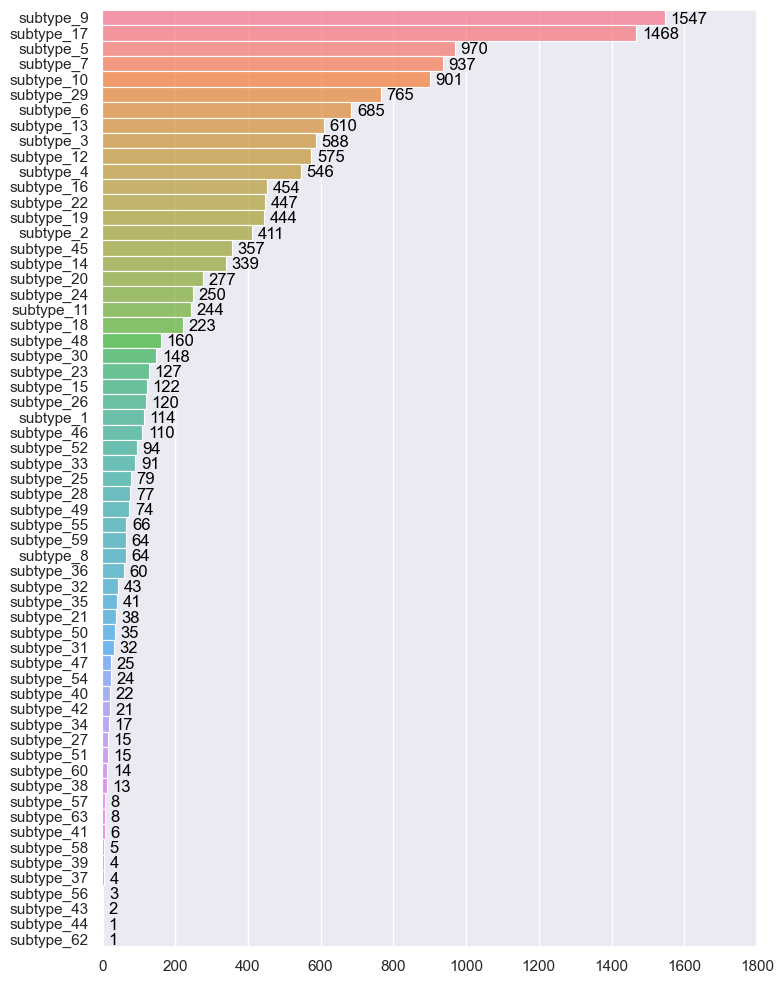

In [20]:
# Построение столбчатой диаграммы, отражающей соотношение количество поступивших комментариев по уточненным видам

p = so.Plot(data = df_detailed_types, x='comments_count', y='comment_detailed_type', text='comments_count',
           color="comment_detailed_type").layout(size=(8, 10))
(
p.add(so.Bars(), legend=False)
 .add(so.Text(halign='left', color='black'))
 .label(x="", y="", color="")
 .limit(x=(0, 1800))
 .show()
)

Уточненные виды комментариев subtype_9 и subtype_17 лидируют с заметным отрывом от ближайшего subtype_5, их число в 1,5 раза больше. Следует обратить внимание с точки зрения контроля качества на данные категории для минимизации комментариев заказчика данного типа.

3. **Динамика** поступления комментариев в течение периода:

In [21]:
df_comments_dates = df.copy()
# Создание колонки 'date', для использования месяца в качестве временного шага
# при анализе динамики поступления комментариев
df_comments_dates['date'] = df_comments_dates['comment_creation_date'].dt.strftime("%Y-%m")

In [22]:
# Группировка поступивших комментариев по месяцам
df_comments_dates_graph = df_comments_dates[['date', 'system_id']].\
                groupby('date').\
                agg({'system_id':'count'}).\
                rename(columns={'system_id': 'comments_count'}).\
                sort_values('date').\
                reset_index().copy()

In [23]:
df_comments_dates_graph

,date,comments_count
0,2022-01,273
1,2022-02,580
2,2022-03,743
3,2022-04,1076
4,2022-05,1116
5,2022-06,1081
6,2022-07,945
7,2022-08,809
8,2022-09,705
9,2022-10,928


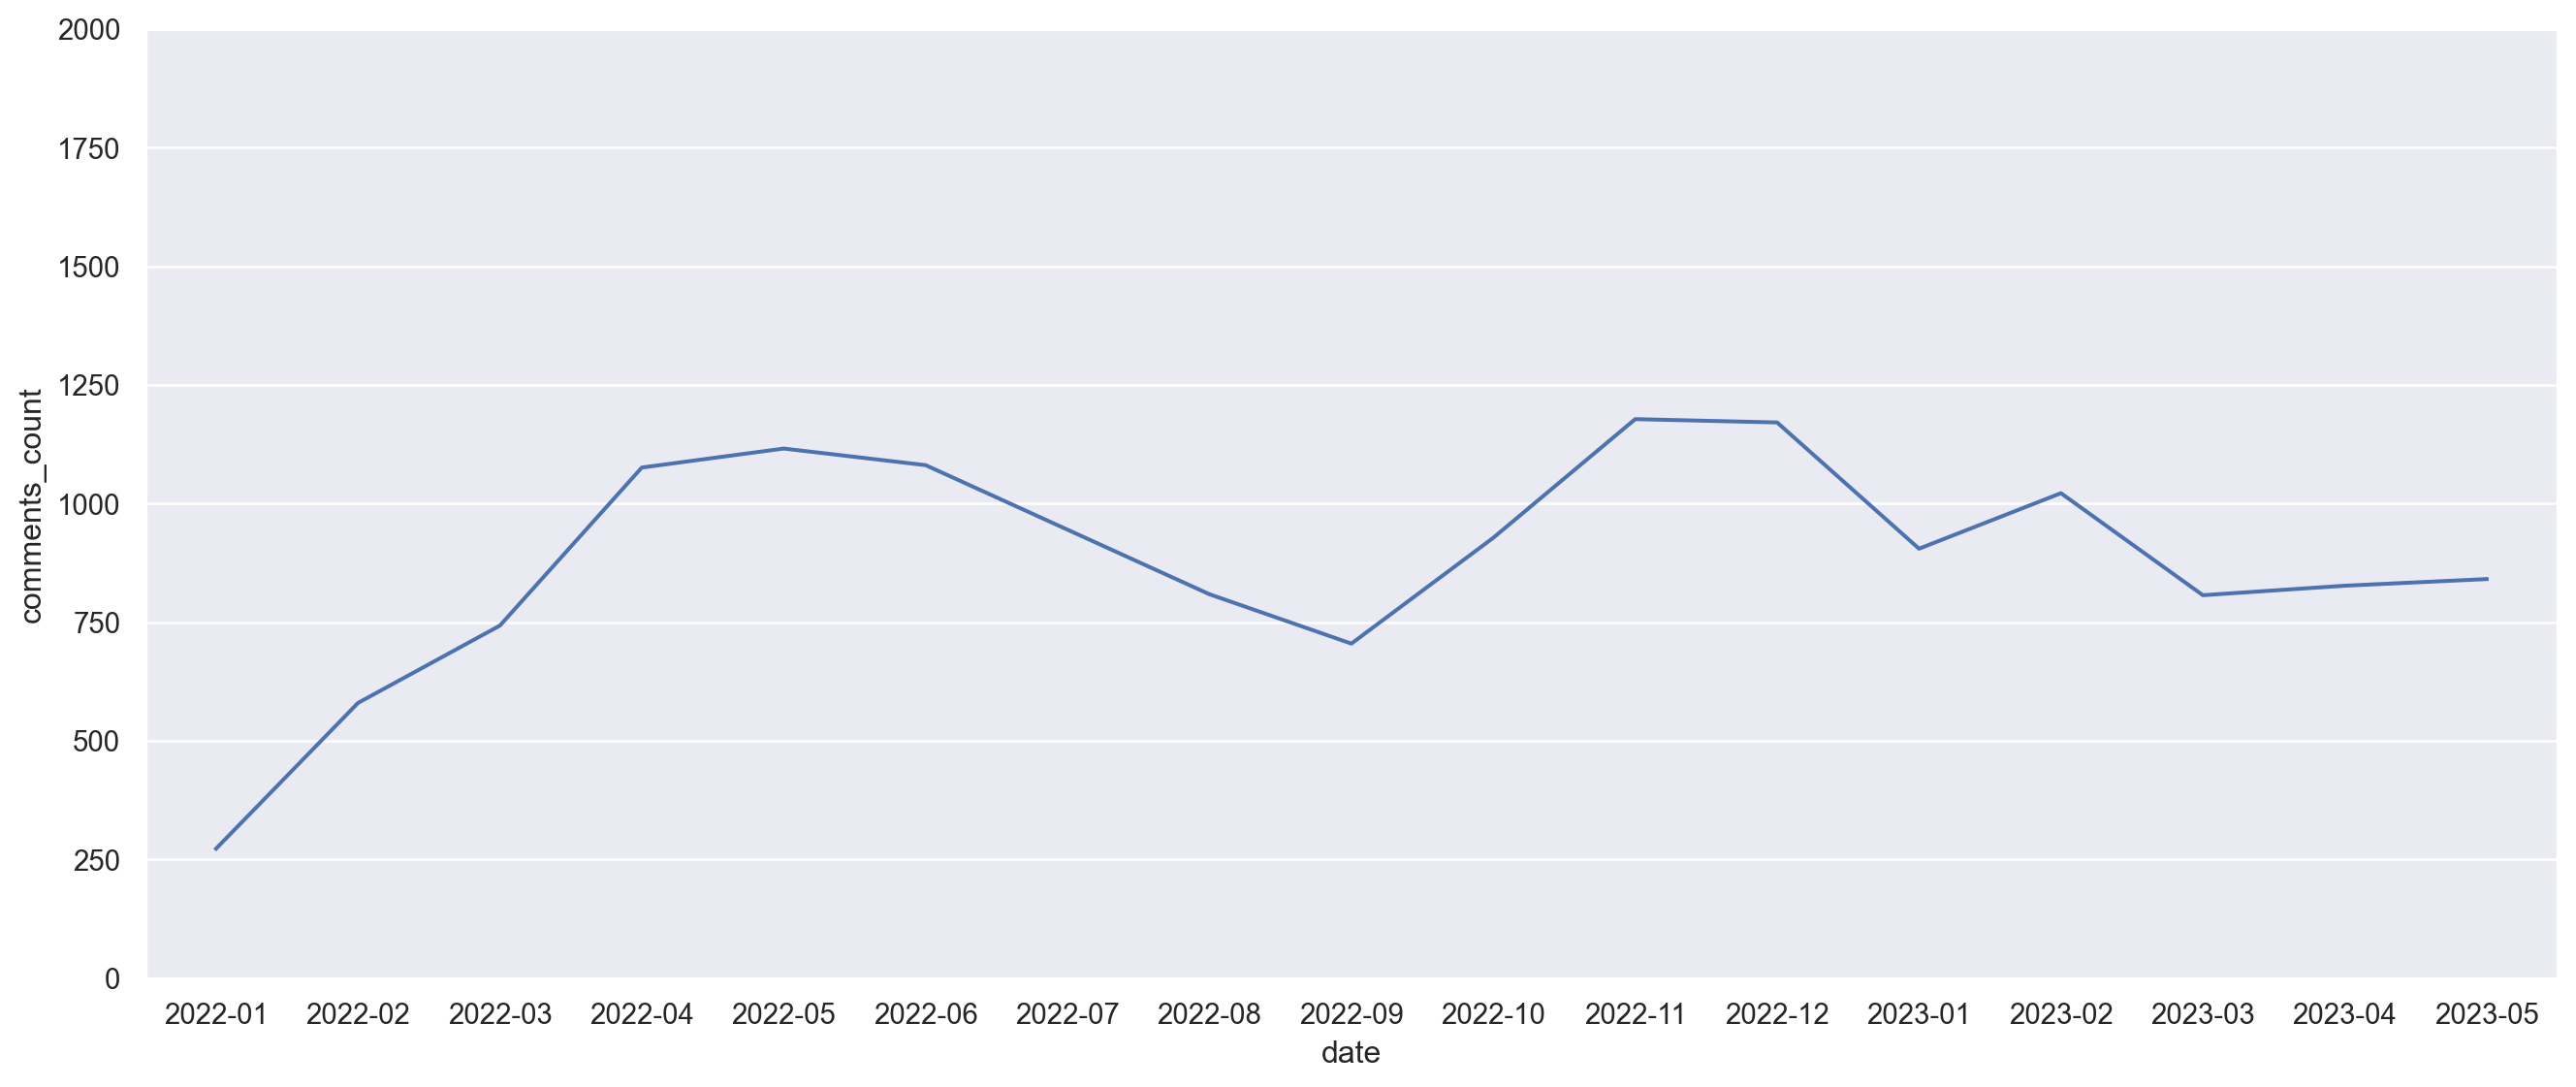

In [24]:
# Динамика поступления комментариев в течение 2022 года в абсолютных значениях
so.Plot(df_comments_dates_graph, "date", "comments_count").add(so.Lines()).layout(size=(14, 6)).limit(y=(0, 2000))

3.1 **Отнормируем** количество комментариев на **количество продукции** в рамках месяца:

In [25]:
# Сформируем дополнительный столбец 'set_rev',
# отражающий уникальную единицу продукции (ID документа с учетом его ревизии):
df_comments_dates['doc-rev'] = df_comments_dates['doc_id'] + '_' + df_comments_dates['set_rev']

# В случае, если данные о ревизии отсутствуют, будем учитывать только ID документа:
df_comments_dates['doc-rev'] = df_comments_dates['doc-rev'].fillna(df_comments_dates['doc_id'])

In [26]:
df_comments_dates

,system_id,comment_creation_date,project_name,set_id,doc_id,set_rev,doc_name,comment_type,comment_detailed_type,comment_text,division,response_text,response_author,response_date,comment_status,comment_author,doc_rev,num_of_pages,date,doc-rev
1,ID-028882,2023-02-07 08:44:19,P1,set-60-000003700,doc-60-000006080,2,doc-60-000006080_name,type_3,subtype_10,comment_text,division_9,response_text,response_author_8,2023-02-17 13:42:57,not_accepted,comment_author_26,2.0,16.0,2023-02,doc-60-000006080_2
2,ID-035413,2023-05-02 05:56:27,P1,set-60-000006465,doc-60-0000010813,1,doc-60-0000010813_name,type_3,subtype_20,comment_text,division_23,response_text,response_author_116,2023-05-11 05:06:46,accepted,comment_author_27,1.0,6.0,2023-05,doc-60-0000010813_1
4,ID-018572,2022-11-22 08:34:50,P1,set-60-000004037,doc-60-000006672,1,doc-60-000006672_name,type_3,subtype_17,comment_text,NaN,response_text,response_author_367,2022-11-29 12:28:24,accepted,NaN,NaN,NaN,2022-11,doc-60-000006672_1
5,ID-014609,2022-09-08 05:25:53,P1,set-60-000002998,doc-60-000004761,2,doc-60-000004761_name,type_1,subtype_24,comment_text,division_16,response_text,response_author_548,2022-09-13 13:00:19,not_accepted,NaN,NaN,NaN,2022-09,doc-60-000004761_2
7,ID-016638,2022-05-15 09:42:24,P1,set-60-000001320,doc-60-000006305,1,doc-60-000006305_name,type_1,subtype_25,comment_text,division_52,response_text,response_author_133,2022-05-24 11:44:38,fixed,NaN,NaN,NaN,2022-05,doc-60-000006305_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18674,ID-035542,2023-05-03 07:37:29,P1,set-65-000006488,doc-65-0000010848,1,doc-65-0000010848_name,type_4,subtype_9,comment_text,division_31,response_text,response_author_71,2023-05-12 08:43:10,not_accepted,comment_author_5,1.0,66.0,2023-05,doc-65-0000010848_1
18675,ID-004337,2022-02-04 13:45:29,P1,set-60-000001650,doc-60-000002299,2,doc-60-000002299_name,type_3,subtype_7,comment_text,division_42,NaN,NaN,NaT,NaN,NaN,NaN,NaN,2022-02,doc-60-000002299_2
18677,ID-019024,2022-12-12 14:05:53,P1,set-65-000002892,doc-65-000004539,2,doc-65-000004539_name,type_1,subtype_16,comment_text,division_46,response_text,NaN,2022-12-14 13:45:03,not_accepted,NaN,NaN,NaN,2022-12,doc-65-000004539_2
18678,ID-033624,2023-04-05 12:13:16,P1,set-65-000002501,doc-65-0000010014,3,doc-65-0000010014_name,type_3,subtype_10,comment_text,division_46,response_text,response_author_636,2023-04-10 05:44:16,fixed,comment_author_48,3.0,34.0,2023-04,doc-65-0000010014_3


In [27]:
# Группируем данные о количесиве комментариев и числе уникальных комплектов документов по месяцам
df_comments_dates_norm_graph = df_comments_dates[['date', 'system_id', 'doc-rev']].\
                groupby('date').\
                agg({'system_id':'count', 'doc-rev': pd.Series.nunique}).\
                rename(columns={'system_id': 'comments_count', 'doc-rev': 'docs_count'}).\
                sort_values('date').\
                reset_index().copy()

In [28]:
df_comments_dates_norm_graph

,date,comments_count,docs_count
0,2022-01,273,223
1,2022-02,580,401
2,2022-03,743,538
3,2022-04,1076,712
4,2022-05,1116,766
5,2022-06,1081,720
6,2022-07,945,657
7,2022-08,809,549
8,2022-09,705,471
9,2022-10,928,594


In [29]:
# Нормируем число комментариев на количесвто уникальных комплектов
df_comments_dates_norm_graph['comments_normalized'] = df_comments_dates_norm_graph['comments_count'] / \
                                                      df_comments_dates_norm_graph['docs_count']

In [30]:
df_comments_dates_norm_graph

,date,comments_count,docs_count,comments_normalized
0,2022-01,273,223,1.224215
1,2022-02,580,401,1.446384
2,2022-03,743,538,1.381041
3,2022-04,1076,712,1.511236
4,2022-05,1116,766,1.456919
5,2022-06,1081,720,1.501389
6,2022-07,945,657,1.438356
7,2022-08,809,549,1.473588
8,2022-09,705,471,1.496815
9,2022-10,928,594,1.562290


Для возможности построения линии тренда введем дополнительный атрибут с порядковым номером месяца:

In [31]:
df_comments_dates_norm_graph['month_num'] = range(1,18,1)

In [32]:
df_comments_dates_norm_graph

,date,comments_count,docs_count,comments_normalized,month_num
0,2022-01,273,223,1.224215,1
1,2022-02,580,401,1.446384,2
2,2022-03,743,538,1.381041,3
3,2022-04,1076,712,1.511236,4
4,2022-05,1116,766,1.456919,5
5,2022-06,1081,720,1.501389,6
6,2022-07,945,657,1.438356,7
7,2022-08,809,549,1.473588,8
8,2022-09,705,471,1.496815,9
9,2022-10,928,594,1.562290,10


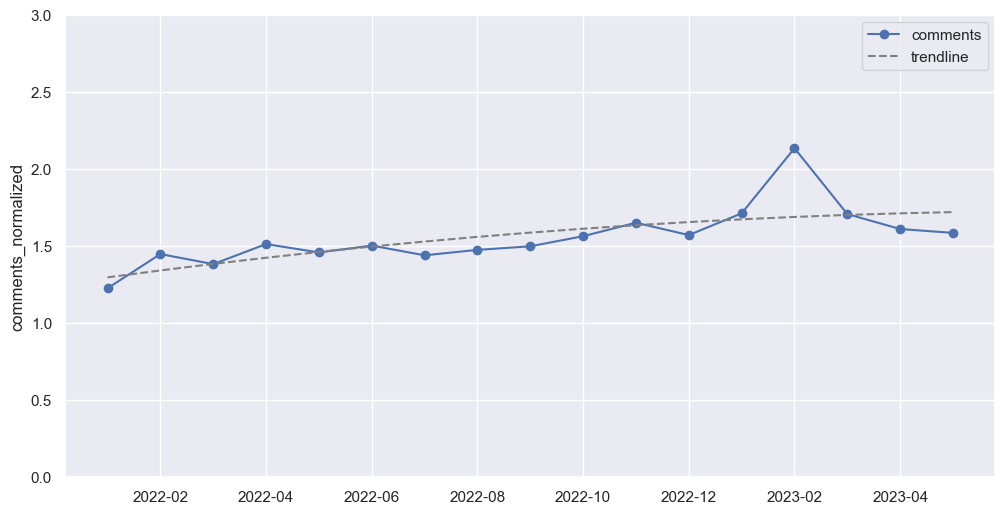

In [53]:
# Линейный график, отражающий динамику получения комментариев к числу переданных заказчику документов по месяцам

x = df_comments_dates_norm_graph['month_num']
y = df_comments_dates_norm_graph['comments_normalized']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_ylim(0, 3)
sns.set_theme()
# Линейный график по известным точкам
plt.plot(x, y,'o-',label='comments')

# Вычисление квадратичной зависимости для линии тренда по известным точкам
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
# Линия тренда
plt.plot(x, p(x),ls='--',color='grey',label='trendline')

plt.legend()
# Изменяем значения месяцев с цифр на даты
plt.xticks(x, df_comments_dates_norm_graph['date'].array)
# Устанавливаем шаг сетки по X равным '2'
ax.xaxis.set_major_locator(plt.MultipleLocator(2))


# Подпись по оси Y
ax.set_ylabel('comments_normalized')

plt.show()

In [34]:
# Оценим медианное число комментариев в течение периода (резкие скачки отсутствуют)
df_comments_dates_norm_graph['comments_normalized'].median()

1.5112359550561798

**Вывод**: тренд получаемых комментариев показывал умеренный рост в течение года с тенденцией к выходу на стационарный уровень в 2023. Медианный показатель в течение года составил 1.5 комментария на единицу продукции.

3.2 Проанализируем динамику нормализованных комментариев **по группам**:

In [35]:
# Группируем данные о количесиве комментариев и типам комментариев документов по месяцам
df_comments_types_norm_graph = df_comments_dates[['date', 'system_id', 'comment_type']].\
                groupby(['date', 'comment_type']).\
                agg({'system_id':'count'}).\
                rename(columns={'system_id': 'comments_count'}).\
                sort_values('date').\
                reset_index().\
                copy()

In [36]:
df_comments_types_norm_graph

,date,comment_type,comments_count
0,2022-01,type_1,69
1,2022-01,type_3,95
2,2022-01,type_4,103
3,2022-01,type_5,6
4,2022-02,type_1,220
...,...,...,...
81,2023-05,type_3,321
82,2023-05,type_4,37
83,2023-05,type_1,367
84,2023-05,type_2,8


In [37]:
# Добавляем столбец 'sets_count' с данными по числу уникальных единиц продукции (комплектов документации),
# сгруппированных по месяцам
df_comments_types_norm_graph = df_comments_types_norm_graph.merge(df_comments_dates_norm_graph[['date', 'docs_count']],
                                                                  how='left', on='date')

In [38]:
df_comments_types_norm_graph

,date,comment_type,comments_count,docs_count
0,2022-01,type_1,69,223
1,2022-01,type_3,95,223
2,2022-01,type_4,103,223
3,2022-01,type_5,6,223
4,2022-02,type_1,220,401
...,...,...,...,...
81,2023-05,type_3,321,531
82,2023-05,type_4,37,531
83,2023-05,type_1,367,531
84,2023-05,type_2,8,531


In [39]:
# Нормируем число комментариев по типам на общее число комплектов в рамках месяца
df_comments_types_norm_graph['comments_type_normalized'] = df_comments_types_norm_graph['comments_count'] / \
                                                      df_comments_types_norm_graph['docs_count']

In [40]:
df_comments_types_norm_graph

,date,comment_type,comments_count,docs_count,comments_type_normalized
0,2022-01,type_1,69,223,0.309417
1,2022-01,type_3,95,223,0.426009
2,2022-01,type_4,103,223,0.461883
3,2022-01,type_5,6,223,0.026906
4,2022-02,type_1,220,401,0.548628
...,...,...,...,...,...
81,2023-05,type_3,321,531,0.604520
82,2023-05,type_4,37,531,0.069680
83,2023-05,type_1,367,531,0.691149
84,2023-05,type_2,8,531,0.015066


C:\Users\kvant\AppData\Local\Temp\ipykernel_25548\4119248867.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


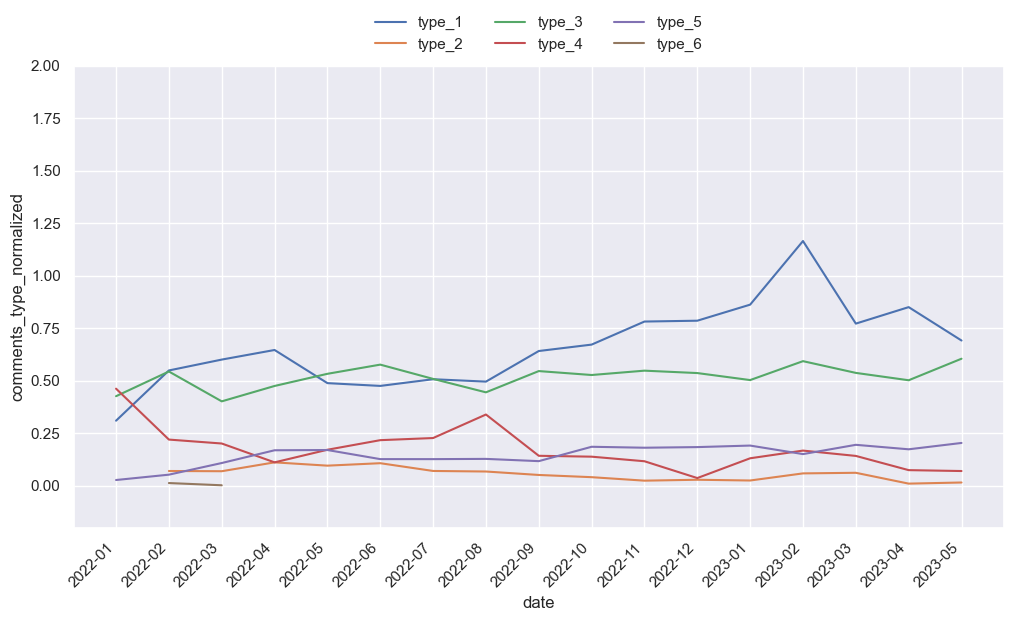

In [41]:
plt.figure(figsize=(12,6))
sns.set_theme()
ax = sns.lineplot(
    data=df_comments_types_norm_graph, x="date", y="comments_type_normalized", hue="comment_type",
    hue_order=['type_1','type_2','type_3','type_4','type_5','type_6'])
ax.axes.set_ylim(-0.2,2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.show()

Документация получившая наибольшее количество замечаний:

In [42]:
df_comments_sets = df_comments_dates[['doc-rev', 'system_id']].groupby('doc-rev').agg({'system_id':'count'}).\
                            rename(columns={'system_id': 'comments_count'}).\
                            sort_values('comments_count', ascending=False).copy()

In [43]:
df_comments_sets.head(10)

,comments_count
doc-rev,
doc-60-000003_1,43
doc-60-00000205_1,35
doc-60-000009476_2,31
doc-60-000007021_2,31
doc-60-000003133_1,30
doc-60-000009068_1,30
doc-60-00000500_1,29
doc-65-000001033_1,28
doc-60-000003128_1,25


Анализ по разработчику докуемнтации:

In [44]:
df_comments_types_norm_graph_designer = df_comments_types_norm_graph.copy()

In [45]:
def check_code(value):
    if '55' in value:
        return 'Company_1'
    if '60' in value:
        return 'Company_2'
    if '65' in value:
        return 'Company_3'

In [46]:
# Размечаем комментарии по инетересующим компаниям разработчикам в отдельном столбце 'designer_name'
df_comments_dates['designer_name'] = df_comments_dates['doc_id'].map(check_code)

In [47]:
df_comments_dates

,system_id,comment_creation_date,project_name,set_id,doc_id,set_rev,doc_name,comment_type,comment_detailed_type,comment_text,...,response_text,response_author,response_date,comment_status,comment_author,doc_rev,num_of_pages,date,doc-rev,designer_name
1,ID-028882,2023-02-07 08:44:19,P1,set-60-000003700,doc-60-000006080,2,doc-60-000006080_name,type_3,subtype_10,comment_text,...,response_text,response_author_8,2023-02-17 13:42:57,not_accepted,comment_author_26,2.0,16.0,2023-02,doc-60-000006080_2,Company_2
2,ID-035413,2023-05-02 05:56:27,P1,set-60-000006465,doc-60-0000010813,1,doc-60-0000010813_name,type_3,subtype_20,comment_text,...,response_text,response_author_116,2023-05-11 05:06:46,accepted,comment_author_27,1.0,6.0,2023-05,doc-60-0000010813_1,Company_2
4,ID-018572,2022-11-22 08:34:50,P1,set-60-000004037,doc-60-000006672,1,doc-60-000006672_name,type_3,subtype_17,comment_text,...,response_text,response_author_367,2022-11-29 12:28:24,accepted,NaN,NaN,NaN,2022-11,doc-60-000006672_1,Company_2
5,ID-014609,2022-09-08 05:25:53,P1,set-60-000002998,doc-60-000004761,2,doc-60-000004761_name,type_1,subtype_24,comment_text,...,response_text,response_author_548,2022-09-13 13:00:19,not_accepted,NaN,NaN,NaN,2022-09,doc-60-000004761_2,Company_2
7,ID-016638,2022-05-15 09:42:24,P1,set-60-000001320,doc-60-000006305,1,doc-60-000006305_name,type_1,subtype_25,comment_text,...,response_text,response_author_133,2022-05-24 11:44:38,fixed,NaN,NaN,NaN,2022-05,doc-60-000006305_1,Company_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18674,ID-035542,2023-05-03 07:37:29,P1,set-65-000006488,doc-65-0000010848,1,doc-65-0000010848_name,type_4,subtype_9,comment_text,...,response_text,response_author_71,2023-05-12 08:43:10,not_accepted,comment_author_5,1.0,66.0,2023-05,doc-65-0000010848_1,Company_3
18675,ID-004337,2022-02-04 13:45:29,P1,set-60-000001650,doc-60-000002299,2,doc-60-000002299_name,type_3,subtype_7,comment_text,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,2022-02,doc-60-000002299_2,Company_2
18677,ID-019024,2022-12-12 14:05:53,P1,set-65-000002892,doc-65-000004539,2,doc-65-000004539_name,type_1,subtype_16,comment_text,...,response_text,NaN,2022-12-14 13:45:03,not_accepted,NaN,NaN,NaN,2022-12,doc-65-000004539_2,Company_3
18678,ID-033624,2023-04-05 12:13:16,P1,set-65-000002501,doc-65-0000010014,3,doc-65-0000010014_name,type_3,subtype_10,comment_text,...,response_text,response_author_636,2023-04-10 05:44:16,fixed,comment_author_48,3.0,34.0,2023-04,doc-65-0000010014_3,Company_3


In [48]:
df_comments_dates_norm_designer_graph = df_comments_dates[['date','system_id','designer_name']].\
                groupby(['date','designer_name']).\
                agg({'system_id':'count'}).\
                rename(columns={'system_id': 'comments_count'}).\
                sort_values('date').\
                reset_index().copy()

In [49]:
df_comments_dates_norm_designer_graph

,date,designer_name,comments_count
0,2022-01,Company_1,8
1,2022-01,Company_2,134
2,2022-01,Company_3,131
3,2022-02,Company_1,15
4,2022-02,Company_2,282
5,2022-02,Company_3,283
6,2022-03,Company_1,19
7,2022-03,Company_2,377
8,2022-03,Company_3,347
9,2022-04,Company_1,33


In [50]:
# Объединяем текущий датафрейм с уже рассчитанным общим количеством документов по месяцам
df_comments_dates_norm_designer_graph = df_comments_dates_norm_designer_graph.merge(df_comments_dates_norm_graph[['date', 'docs_count']],
                                                                  how='left', on='date')

In [51]:
# Нормируем полученные комментарии к продукции каждой из рассматриваемых компаний к общему числу документов за месяц
df_comments_dates_norm_designer_graph['comments_normalized'] = df_comments_dates_norm_designer_graph['comments_count'] / \
                                                      df_comments_dates_norm_designer_graph['docs_count']

C:\Users\kvant\AppData\Local\Temp\ipykernel_25548\3403719217.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


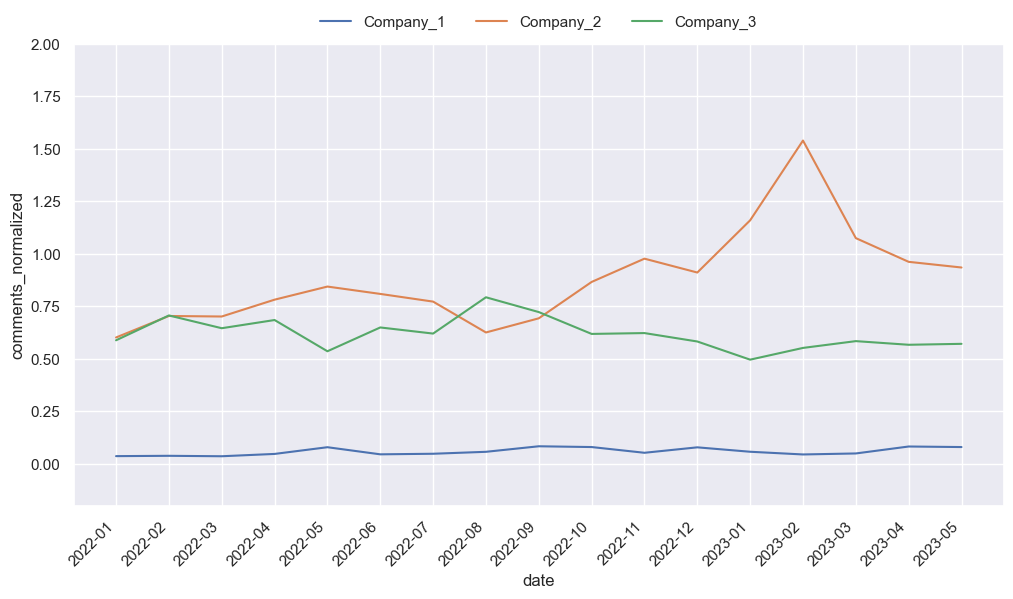

In [52]:
plt.figure(figsize=(12,6))
sns.set_theme()
ax = sns.lineplot(
    data=df_comments_dates_norm_designer_graph, x="date", y="comments_normalized", hue="designer_name",
            hue_order=['Company_1','Company_2','Company_3'])
ax.axes.set_ylim(-0.2,2.0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.show()

**Вывод:** у компании Company_2 наблюдается рост комментариев к разработанной документации с начала года. Рекомендуется выполнить дополнительный анализ для данного разработчика. Например, уточнить какие именно документы выпускались за последний период, возможно изменился тип выпускаемой документации (проверить по внутренним подразделениям-разработчикам, возможно оперделенный отдел начал выпуск характерной документации в своей зоне ответственности). 